# Loan Default Case Study

**Problem Statement**

A consumer finance company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Analysis has to be conducted summarising the risk assessment the bank could carry out to reduce the risk of loan default.






## Fixing Rows and Columns by checking the raw file

For Rows:
- Check for summary rows: No action needed
- Check for incorrect rows (Header rows, Footer rows): No action needed 
- Check forincorrect rows (Column number, indicators, Blank rows, Page No): No action needed




**Import libraries and check few rows**



In [270]:
#import the libraries
import pandas as pd 
import numpy as np


#import the plotting libraries

import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
#read the dataset and check the first five rows
df0 = pd.read_csv('loan.csv')
df0.head()

/var/folders/6r/1xvkby6d0msg6nxmsqjs8zv40000gn/T/ipykernel_4466/1245689009.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Fixing Rows and Columns**

For Columns:
- Check for merge and split requirements: No action needed
- Check for missing column names: No action needed 
- Are column names consistent: Yes 

In [272]:
# Find the shape 

df0.shape

(39717, 111)

In [273]:
# listing null value counts of each column

df1=df0.isnull().sum()
print(df1.values)


[    0     0     0     0     0     0     0     0     0     0  2459  1075
     0     0     0     0     0     0     0 12940     0    11     0     0
     0     0     0     0 25682 36931     0     0     0    50     0     0
     0     0     0     0     0     0     0     0     0    71     0 38577
     2    56 39717     0     0 39717 39717 39717     0 39717 39717 39717
 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717
 39717 39717 39717 39717 39717 39717    56     0 39717 39717 39717 39717
 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717
 39717 39717 39717 39717 39717 39717 39717 39717 39717   697    39 39717
 39717 39717 39717]


**Many columns have lot of null values. There's one column with 2459 null values but that's about 6%. 
So let's delete columns with null values more than that**




In [274]:
#Create columns list with lot of null values

delete_col = list(df1[df1.values>=12940].index)
#print(delete_col)



In [275]:
#Drop columns with lot of null values

#testdf = df0.drop(columns=delete_col, axis='columns')
#testdf.shape

df0.drop(columns=delete_col, axis='columns', inplace=True)
df0.shape

(39717, 53)

In [276]:
# Checking the columns for null

df0.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [277]:
#Check the datatypes of all the columns of the dataframe

df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397



## Verify Column values

In [282]:
df0['term'].value_counts()
df0['int_rate'].value_counts()
df0['grade'].value_counts()

df0['sub_grade'].value_counts()
df0['emp_title'].value_counts()
df0['emp_length'].value_counts()

df0['home_ownership'].value_counts() # There are few entries that don't make sense. We delete such rows
df0.drop(df0[df0['home_ownership'].isin(['OTHER','NONE'])].index, inplace=True)

df0['verification_status'].value_counts()
df0['issue_d'].value_counts()
df0['loan_status'].value_counts() # The analysis will focus on paid and charged-off. Hence delete others
df0.drop(df0[df0['loan_status'].isin(['Current'])].index, inplace=True)

df0['pymnt_plan'].value_counts()  # This has single value. Hence drop this column
df0.drop(['pymnt_plan'], axis=1, inplace=True)

df0['purpose'].value_counts()
df0['title'].value_counts()
df0['dti'].value_counts()

df0['earliest_cr_line'].value_counts()
df0['revol_util'].value_counts()

df0['initial_list_status'].value_counts() # This has single value. Hence drop this column
df0.drop(['initial_list_status'], axis=1, inplace=True)

df0['last_pymnt_d'].value_counts()
df0['last_credit_pull_d'].value_counts()

df0['application_type'].value_counts() # This has single value. Hence drop this column
df0.drop(['application_type'], axis=1, inplace=True)

In [283]:

df0.shape


(38476, 50)

## Outlier analysis

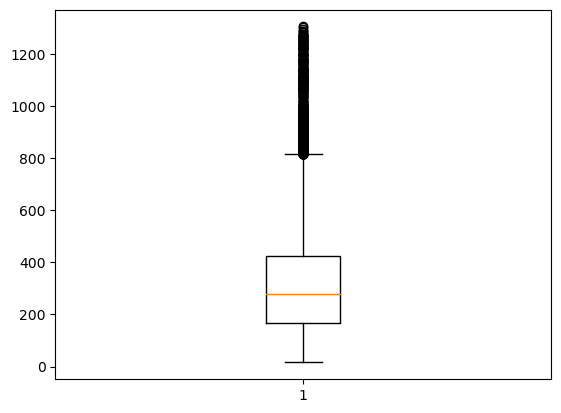

In [284]:
#Create a box plot for the installment column
plt.boxplot(df0['installment'])
plt.show()

#df0['installment'].describe()


**Looks like there are lot of outliers. So we delete rows where installment > 1000**

In [285]:
#df0[df0['installment']>1000]

df0.drop(df0[df0['installment']>1000].index, inplace=True)

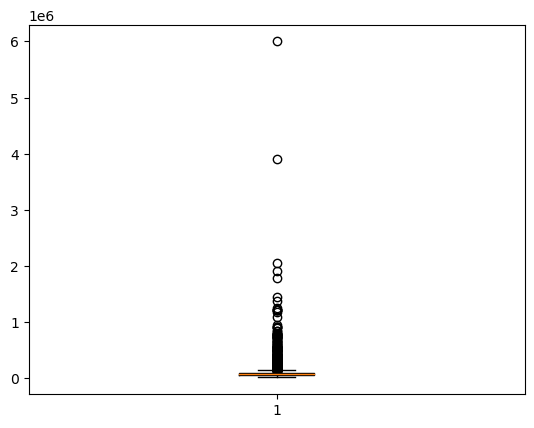

In [286]:
#Create a box plot for the annual_inc column
plt.boxplot(df0['annual_inc'])
plt.show()



In [287]:
df0['annual_inc'].describe()

count    3.824100e+04
mean     6.831523e+04
std      6.369995e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.800000e+04
75%      8.160000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

**Looks like there are lot of outliers. So we delete rows where annual_inc > 100000**

In [288]:

df0.drop(df0[df0['annual_inc']>100000].index, inplace=True)

In [289]:
#No action needed for dti as that is a ratio
#df0['delinq_2yrs'].describe()
#df0['inq_last_6mths'].describe()
df0['open_acc'].describe()

count    32912.000000
mean         8.979369
std          4.284882
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64

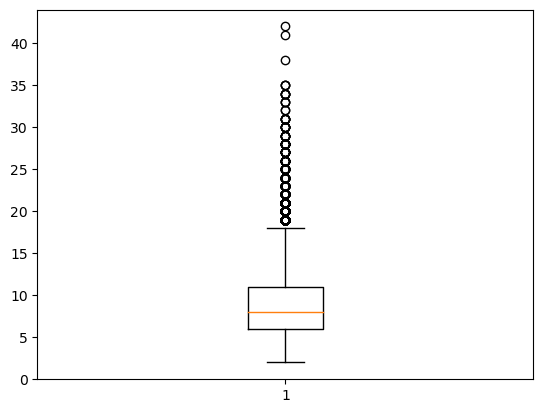

In [290]:
#Create a box plot for the open_acc column
plt.boxplot(df0['open_acc'])
plt.show()

**We delete outliers- where open_acc > 20**

In [291]:
df0.drop(df0[df0['open_acc']>20].index, inplace=True)

In [292]:

df0['pub_rec'].describe()


count    32369.000000
mean         0.058142
std          0.242190
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [293]:
df0['revol_bal'].describe()


count     32369.000000
mean      10957.034848
std       11602.969580
min           0.000000
25%        3317.000000
50%        7871.000000
75%       14750.000000
max      149000.000000
Name: revol_bal, dtype: float64

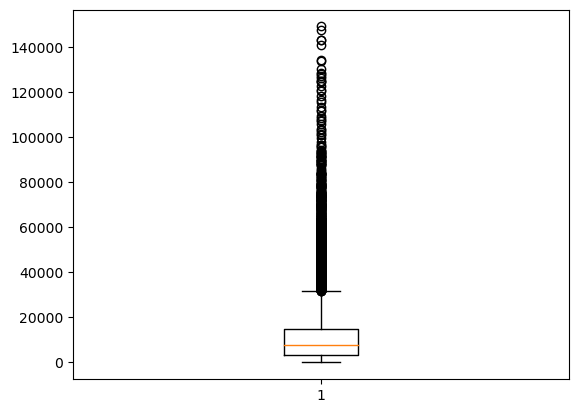

In [294]:
#Create a box plot for the revol_bal column
plt.boxplot(df0['revol_bal'])
plt.show()


**We delete outliers- where revol_bal > 40000**

In [295]:
df0.drop(df0[df0['revol_bal']>40000].index, inplace=True)

In [296]:
df0['total_acc'].describe()

count    31508.000000
mean        20.254856
std         10.418289
min          2.000000
25%         12.000000
50%         19.000000
75%         26.000000
max         87.000000
Name: total_acc, dtype: float64

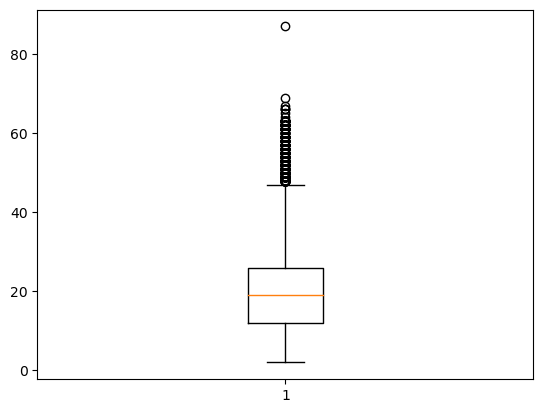

In [297]:
#Create a box plot for the total_acc column
plt.boxplot(df0['total_acc'])
plt.show()

**We delete outliers- where total_acc > 50**

In [298]:
df0.drop(df0[df0['total_acc']>50].index, inplace=True)

**Similar exercise shouldn't be done for 'outstanding prinicipal', 'payment received', 'interest/fees received' and 'recoveries'**

In [299]:
df0['last_pymnt_amnt'].describe()

count    31192.00000
mean      2389.31435
std       3924.73552
min          0.00000
25%        200.98500
50%        496.14000
75%       2994.00250
max      36115.20000
Name: last_pymnt_amnt, dtype: float64

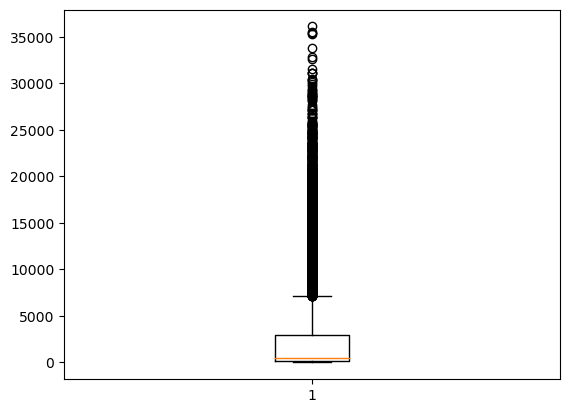

In [300]:
#Create a box plot for the last_pymnt_amnt column
plt.boxplot(df0['last_pymnt_amnt'])
plt.show()

**Delete outliers - last_pymnt_amnt>10000**

In [301]:
df0.drop(df0[df0['last_pymnt_amnt']>10000].index, inplace=True)

In [302]:
df0['collections_12_mths_ex_med'].describe() 
#All the values are 0. Hence drop the column

count    29338.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [303]:
df0.drop(['collections_12_mths_ex_med'], axis=1, inplace=True)

In [304]:
df0['policy_code'].describe() 
#All the values are 1. Hence drop the column



count    29373.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [305]:
df0.drop(['policy_code'], axis=1, inplace=True)

In [306]:
df0['acc_now_delinq'].describe() 
#All the values are 0. Hence drop the column


count    29373.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [307]:
df0.drop(['acc_now_delinq'], axis=1, inplace=True)

In [308]:
df0['chargeoff_within_12_mths'].describe() 
#All the values are 0. Hence drop the column


count    29338.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [309]:
df0.drop(['chargeoff_within_12_mths'], axis=1, inplace=True)

In [310]:
df0['delinq_amnt'].describe() 
#All the values are 0. Hence drop the column


count    29373.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64

In [311]:
df0.drop(['delinq_amnt'], axis=1, inplace=True)

In [312]:
#df0['pub_rec_bankruptcies'].describe()

df0['tax_liens'].describe() 
#All the values are 0. Hence drop the column


count    29352.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [313]:
df0.drop(['tax_liens'], axis=1, inplace=True)

In [314]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29373 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29373 non-null  int64  
 1   member_id                29373 non-null  int64  
 2   loan_amnt                29373 non-null  int64  
 3   funded_amnt              29373 non-null  int64  
 4   funded_amnt_inv          29373 non-null  float64
 5   term                     29373 non-null  object 
 6   int_rate                 29373 non-null  object 
 7   installment              29373 non-null  float64
 8   grade                    29373 non-null  object 
 9   sub_grade                29373 non-null  object 
 10  emp_title                27536 non-null  object 
 11  emp_length               28489 non-null  object 
 12  home_ownership           29373 non-null  object 
 13  annual_inc               29373 non-null  float64
 14  verification_status   

In [315]:

df0.shape

(29373, 44)

## PREP - ANALYSIS of loan_status

Categorical

- addr_state             
- dti  - make bins                  
- emp_length             
- grade, sub_grade        
- home_ownership          
- open_acc, total_acc - check correlation  
- pub_rec, pub_rec_bankruptcies - check correlation  
- delinq_2yrs             
- purpose                 
- verification_status     


Contiguous

- annual_inc - make bins     
- loan_amnt - make bins       



PREP - DERIVED METRICS

1. loan_status_count (Based on loan_status) := 1 if charged-off, 0 otherwise
2. annual_inc_bin = 0 to 25000, 25001 to 50000, 50001 to 75000 and > 75000 
3. loan_amnt = 0 to 5000, 5001 to 8000, 8001 to 12000, 12001 to 23000 and >23000

In [316]:
df0['loan_status'].value_counts()

Fully Paid     24645
Charged Off     4728
Name: loan_status, dtype: int64

In [317]:
#create new column from loan_status
df0['loan_status_count'] = df0['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [318]:
df0['loan_status_count'].value_counts()

0    24645
1     4728
Name: loan_status_count, dtype: int64

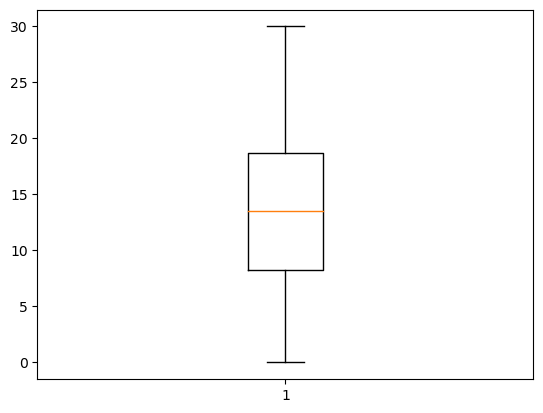

In [319]:
#Create a boxplot of the dti column
plt.boxplot(df0['dti'])
plt.show()

In [320]:
df0['dti'].describe()

count    29373.000000
mean        13.375337
std          6.685597
min          0.000000
25%          8.220000
50%         13.510000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

In [321]:
#Create dti bin
def dti_bin (row):
   if row['dti'] >= 0 and row['dti'] <= 8.22:
      return '0 to 8.22'
   if row['dti'] > 8.22 and row['dti'] <= 13.51:
      return '8.23 to 13.51'
   if row['dti'] >= 13.51 and row['dti'] <= 18.68:
      return '13.52 to 18.68'
   return '>18.68'

df0['dti_bin'] = df0.apply (lambda row: dti_bin(row), axis=1)

In [322]:
df0['annual_inc'].describe()

count     29373.000000
mean      52890.989938
std       20842.014410
min        4000.000000
25%       36996.000000
50%       50004.000000
75%       67450.000000
max      100000.000000
Name: annual_inc, dtype: float64

In [323]:
#Create Annual Income bin
def annual_inc_bin (row):
   if row['annual_inc'] >= 0 and row['annual_inc'] <= 25000:
      return '0 to 25000'
   if row['annual_inc'] >= 25001 and row['annual_inc'] <= 50000:
      return '25001 to 50000'
   if row['annual_inc'] >= 50001 and row['annual_inc'] <= 75000:
      return '50001 to 75000'
   return '>75000'

df0['annual_inc_bin'] = df0.apply (lambda row: annual_inc_bin(row), axis=1)

In [324]:
df0['annual_inc_bin'].value_counts()

25001 to 50000    12155
50001 to 75000    10089
>75000             4603
0 to 25000         2526
Name: annual_inc_bin, dtype: int64

In [325]:
#Create a boxplot of the annual_inc column
df0['loan_amnt'].describe()

count    29373.000000
mean      9348.273925
std       5972.397604
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

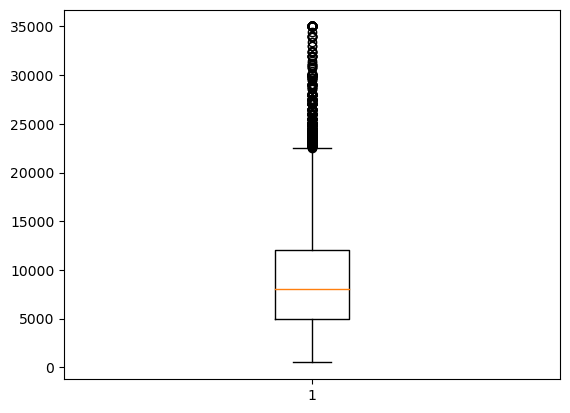

In [326]:
#Create a boxplot of the annual_inc column
plt.boxplot(df0['loan_amnt'])
plt.show()

In [327]:
#Create Loan Amount bin
def loan_amnt_bin (row):
   if row['loan_amnt'] >= 0 and row['loan_amnt'] <= 5000:
      return '0 to 5000'
   if row['loan_amnt'] >= 5001 and row['loan_amnt'] <= 8000:
      return '5001 to 8000'
   if row['loan_amnt'] >= 8001 and row['loan_amnt'] <= 12000:
      return '8001 to 12000'
   if row['loan_amnt'] >= 12001 and row['loan_amnt'] <= 23000:
      return '12001 to 23000'
   return '>23000'

df0['loan_amnt_bin'] = df0.apply (lambda row: loan_amnt_bin(row), axis=1)

In [328]:
df0['loan_amnt_bin'].value_counts()

0 to 5000         8580
8001 to 12000     7029
5001 to 8000      6705
12001 to 23000    5932
>23000            1127
Name: loan_amnt_bin, dtype: int64

## Analysis

In [329]:
#Create dataframe of charged-off loan status
df0_cf = df0[df0['loan_status_count']==1]
df0_cf.shape

(4728, 48)

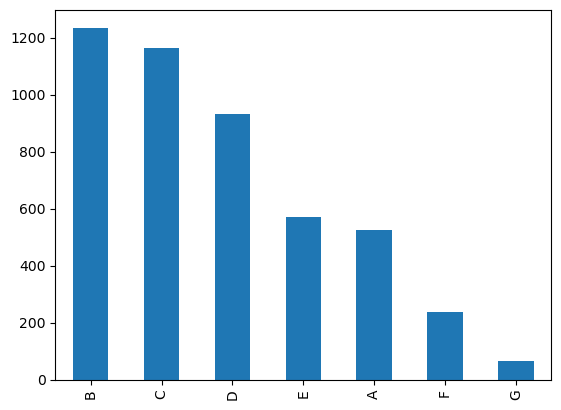

In [330]:
#Plot a bar chart for Grade
df0_cf['grade'].value_counts().plot.bar()
plt.show()



**Important - Grades - A B C D and E seem to contribute significantly to bad loans. Particularly - B C and D**

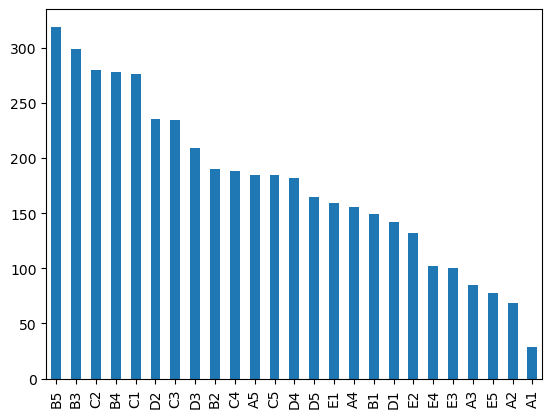

In [331]:
#Plot a bar chart
df0_cf['sub_grade'][df0_cf['grade'].isin(['A','B','C','D','E'])].value_counts().plot.bar()
plt.show()

#Not very insightful

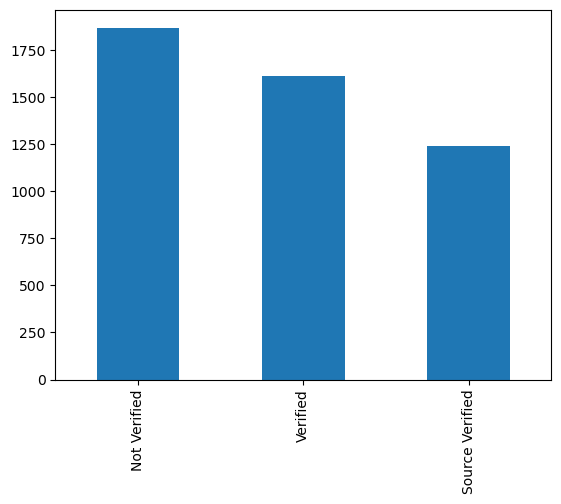

In [332]:
#Plot a bar chart for verification_status
df0_cf['verification_status'].value_counts().plot.bar()
plt.show()

#Not very insightful

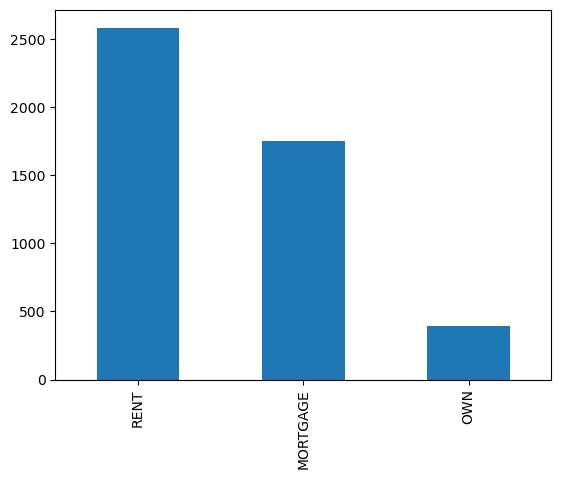

In [333]:
#Plot a bar chart for verification_status
df0_cf['home_ownership'].value_counts().plot.bar()
plt.show()



**People who own home don't tend to default as mush as others do. But others should be analyzed**

In [334]:
#Plot a bar chart for purpose
df0_cf['purpose'].value_counts()



debt_consolidation    2353
other                  528
credit_card            442
small_business         378
home_improvement       271
major_purchase         202
car                    139
medical                 94
moving                  83
wedding                 81
vacation                49
educational             46
house                   45
renewable_energy        17
Name: purpose, dtype: int64

**debt_consolidation, other, credit_card, small_business, home_improvement, major_purchase and car are focus areas. Particularly - debt_consolidation, other, credit_card and small_business**

In [335]:
df0_cf['delinq_2yrs'].value_counts()


0    4161
1     420
2      98
3      32
4      12
5       2
7       1
6       1
8       1
Name: delinq_2yrs, dtype: int64

**Important - delinq_2yrs = 1**

In [336]:

df0_cf['emp_length'].value_counts()



10+ years    1044
< 1 year      553
2 years       493
3 years       482
4 years       396
1 year        391
5 years       384
6 years       264
7 years       216
8 years       158
9 years       133
Name: emp_length, dtype: int64

**emp_length= 1,2,3,4,5 and 10+ are focus areas. Especially 10+**

In [347]:

#Plot a bar chart for annual_inc
df0_cf['annual_inc_bin'].value_counts()

# Not very insighful as even 486 is about 10% of bad loans

25001 to 50000    2066
50001 to 75000    1559
>75000             617
0 to 25000         486
Name: annual_inc_bin, dtype: int64

In [338]:

#Plot a bar chart for loan_amnt_bin
df0_cf['loan_amnt_bin'].value_counts()



12001 to 23000    1245
0 to 5000         1226
8001 to 12000      985
5001 to 8000       871
>23000             401
Name: loan_amnt_bin, dtype: int64

**Not very insightful as even 401 is about 8.5% and for the other bins the spread is similar**

In [339]:

pub_corr = df0_cf['pub_rec'].corr(df0_cf['pub_rec_bankruptcies'])
print(pub_corr)
# Seems strongly correlated. Will use  'pub_rec_bankruptcies'

0.8585914697282653


In [340]:

#Plot a bar chart for dti_bin
df0_cf['dti_bin'].value_counts()

#Not very insightful

>18.68            1336
13.52 to 18.68    1232
8.23 to 13.51     1135
0 to 8.22         1025
Name: dti_bin, dtype: int64

In [341]:

pub_corr = df0_cf['pub_rec'].corr(df0_cf['pub_rec_bankruptcies'])
print(pub_corr)
# Seems strongly correlated. Will use  'pub_rec_bankruptcies'

0.8585914697282653


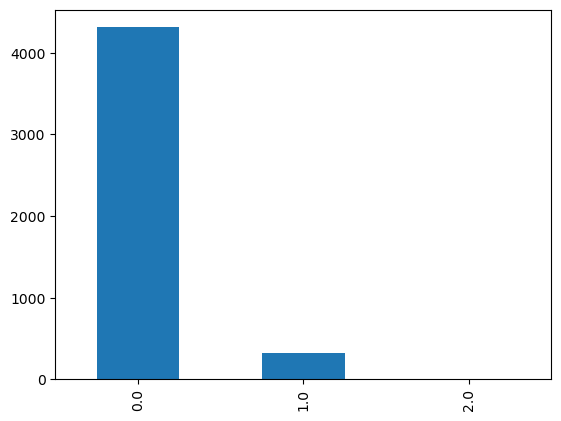

In [342]:


#Plot a bar chart for pub_rec_bankruptcies
df0_cf['pub_rec_bankruptcies'].value_counts().plot.bar()
plt.show()

In [343]:
#Plot a bar chart for loan_amnt_bin
df0_cf['pub_rec_bankruptcies'].value_counts()

#Not very insightful

0.0    4316
1.0     319
2.0       2
Name: pub_rec_bankruptcies, dtype: int64

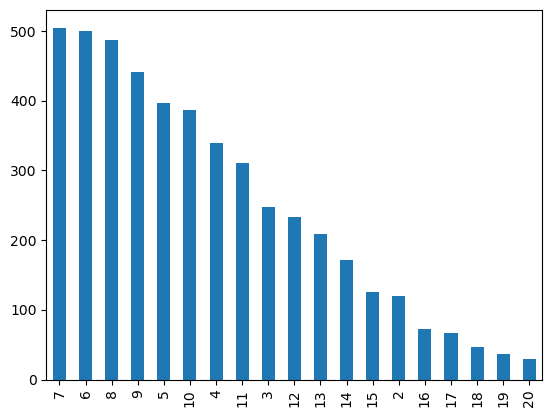

In [344]:

#Plot a bar chart for open_acc
df0_cf['open_acc'].value_counts().plot.bar()
plt.show()

In [345]:
#Plot a bar chart for open_acc
df0_cf['open_acc'].value_counts()


7     505
6     500
8     487
9     441
5     397
10    387
4     340
11    311
3     248
12    233
13    209
14    172
15    125
2     120
16     73
17     67
18     47
19     36
20     30
Name: open_acc, dtype: int64

**Important - open_acc 4 to 11**

In [346]:
#Plot a bar chart for Grade
df0_cf['addr_state'].value_counts()

CA    931
FL    436
NY    411
TX    251
NJ    238
GA    178
IL    166
PA    156
VA    147
OH    138
MA    136
MD    125
MO    107
WA    104
AZ    103
NC    101
NV     87
MI     85
CO     83
CT     80
MN     69
OR     63
SC     54
WI     49
AL     48
LA     44
KY     41
OK     38
UT     32
NM     28
KS     26
HI     24
AR     21
RI     20
NH     19
WV     19
DC     12
AK     12
DE     11
SD     10
MT      9
VT      5
WY      4
NE      3
MS      2
TN      1
ID      1
Name: addr_state, dtype: int64

**Important - addr_state = CA**

## Analysis Outcome

Following observations are made regarding reducing bad loans
- Graded B, C and D are more likely to default
- People who own home don't tend to default as mush as others do. But others should be analyzed
- Loans taken for 'debt_consolidation', 'other', 'credit_card' and 'small_business' are more likely to default 
- People who have been working for about 5 years or more than 10 years tend to default more on loan. Especially 10+
- People who have 4 to 11 credit lines are more liekly to default
- People living in state_code CA are more likely to default